#### Implementação do K-Means

In [100]:
import warnings
warnings.filterwarnings('ignore')

In [101]:
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
#Load Data

### link dataset = https://archive.ics.uci.edu/ml/datasets/Heart+Disease

url = "lib/heart/heart.csv"
url = 'https://drive.google.com/file/d/1E7aR22Wvi3_5am44ARFAvMTWmXtsFjO2/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
# loading dataset into Pandas DataFrame
df = pd.read_csv(path)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [102]:
np.unique(df.iloc[:,-1].values)

array([0, 1], dtype=int64)

In [103]:
qtd_caracteristicas = len(df.columns[:-1])
qtd_saidas = int(len(np.unique(df.iloc[:,-1].values))/2)
qtd_neuronios = int((qtd_caracteristicas+qtd_saidas)/2)

print(f"Base possui {qtd_caracteristicas} com {qtd_saidas} neurônio(s) para saída. Com isso, o número de neurônios das camadas escondidas será {qtd_neuronios}")

Base possui 13 com 1 neurônio(s) para saída. Com isso, o número de neurônios das camadas escondidas será 7


In [104]:
# obter apenas os valores 
features = df.columns[:-1] ## Retirada do Resultado                     
x = df.loc[:, features].values
y = df.iloc[:,-1].values

In [105]:
## Dividindo o dataset
train_features, test_features, train_targets, test_targets = train_test_split(
    x                       ## Array de Features
    , y                     ## Array de Targets
    , test_size = 0.2       ## Percentual do Conjunto de Testes
    , random_state = 123    ## Estado de Random - Serve para manter os valores 
    , stratify = y)         ## Manter proporção de valores da saída do treino similar a saída dos testes

In [106]:
#   Accuracy tells you how many times the ML model was correct overall. 
#   Precision is how good the model is at predicting a specific category. 
#   Recall tells you how many times the model was able to detect a specific category.

In [107]:
# In the docs:

#     hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)

# means : hidden_layer_sizes is a tuple of size (n_layers -2)

# n_layers means no of layers we want as per architecture.

# Value 2 is subtracted from n_layers because two layers (input & output ) are not part of hidden layers, so not belong to the count.

# default(100,) means if no value is provided for hidden_layer_sizes then default architecture will have one input layer, one hidden layer with 100 units and one output layer.

In [108]:
def buildMPLPerceptron(train_features, test_features, train_targets, test_targets
, layer_size = 100, activation_function = 'relu', optimization_function = 'sgd'
, learning = 'invscaling', alp = 0.0001, show_text = False, iter = 40):

    global classifier
    classifier = MLPClassifier(
        hidden_layer_sizes = (layer_size,)
        , max_iter = iter
        , activation = activation_function
        , solver = optimization_function
        , verbose = show_text
        , random_state= 457
        , learning_rate = learning
        , alpha = alp
        )
        
    classifier.fit(train_features, train_targets)
    predictions = classifier.predict(test_features)
    
    accuracy = accuracy_score(test_targets, predictions)
    precision = precision_score(test_targets, predictions)
    recall = recall_score(test_targets, predictions)

    return np.round(accuracy,4), np.round(precision,4), np.round(recall,4)

In [109]:
score = buildMPLPerceptron(train_features, test_features, train_targets, test_targets
, show_text = True, layer_size = qtd_neuronios)
print(f'Accuracy: {score[0]*100}% \nPrecision: {score[1]*100}% \nRecall: {score[2]}')

Iteration 1, loss = 11.77226506
Iteration 2, loss = 16.38348358
Iteration 3, loss = 15.96251628
Iteration 4, loss = 10.28811388
Iteration 5, loss = 4.26032952
Iteration 6, loss = 3.87659011
Iteration 7, loss = 5.83668168
Iteration 8, loss = 6.92784045
Iteration 9, loss = 7.00252408
Iteration 10, loss = 6.46425147
Iteration 11, loss = 5.52084487
Iteration 12, loss = 4.43626742
Iteration 13, loss = 3.40926976
Iteration 14, loss = 2.64875573
Iteration 15, loss = 2.17220576
Iteration 16, loss = 1.99316783
Iteration 17, loss = 1.94881975
Iteration 18, loss = 1.98150119
Iteration 19, loss = 2.02257851
Iteration 20, loss = 2.05240048
Iteration 21, loss = 2.04423784
Iteration 22, loss = 2.01046688
Iteration 23, loss = 1.95324041
Iteration 24, loss = 1.88845437
Iteration 25, loss = 1.82466762
Iteration 26, loss = 1.76961256
Iteration 27, loss = 1.72519765
Iteration 28, loss = 1.69509165
Iteration 29, loss = 1.66768023
Iteration 30, loss = 1.65507144
Iteration 31, loss = 1.63770951
Iteration 32,

In [110]:
# The loss function in a neural network quantifies the difference between the expected outcome 
# and the outcome produced by the machine learning model. 
# From the loss function, we can derive the gradients which are used to update the weights

Iteration 1, loss = 11.77226506
Iteration 2, loss = 16.38348358
Iteration 3, loss = 15.96251628
Iteration 4, loss = 10.28811388
Iteration 5, loss = 4.26032952
Iteration 6, loss = 3.87659011
Iteration 7, loss = 5.83668168
Iteration 8, loss = 6.92784045
Iteration 9, loss = 7.00252408
Iteration 10, loss = 6.46425147
Iteration 11, loss = 5.52084487
Iteration 12, loss = 4.43626742
Iteration 13, loss = 3.40926976
Iteration 14, loss = 2.64875573
Iteration 15, loss = 2.17220576
Iteration 16, loss = 1.99316783
Iteration 17, loss = 1.94881975
Iteration 18, loss = 1.98150119
Iteration 19, loss = 2.02257851
Iteration 20, loss = 2.05240048
Iteration 21, loss = 2.04423784
Iteration 22, loss = 2.01046688
Iteration 23, loss = 1.95324041
Iteration 24, loss = 1.88845437
Iteration 25, loss = 1.82466762
Iteration 26, loss = 1.76961256
Iteration 27, loss = 1.72519765
Iteration 28, loss = 1.69509165
Iteration 29, loss = 1.66768023
Iteration 30, loss = 1.65507144
Iteration 31, loss = 1.63770951
Iteration 32,

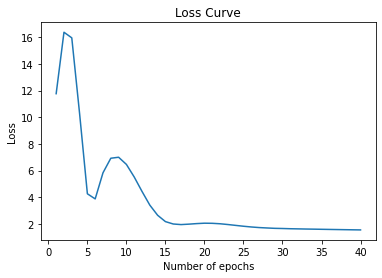

In [111]:
### Curva do resultado da função de perda

model = classifier.fit(train_features, train_targets)

plt.plot(range(1, model.n_iter_ + 1), model.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

In [112]:
## Variando o tamanho das camadas

scores_dict = dict()
for i in range(80 , 120):
    score = buildMPLPerceptron(train_features, test_features, train_targets, test_targets, layer_size = i)
    scores_dict[i] = score

In [113]:
scores_dict

{80: (0.6557, 0.6429, 0.8182),
 81: (0.6721, 0.76, 0.5758),
 82: (0.5738, 0.5897, 0.697),
 83: (0.7049, 0.7027, 0.7879),
 84: (0.6885, 0.675, 0.8182),
 85: (0.6885, 0.675, 0.8182),
 86: (0.7049, 0.6744, 0.8788),
 87: (0.7541, 0.7647, 0.7879),
 88: (0.6393, 0.6486, 0.7273),
 89: (0.6885, 0.6667, 0.8485),
 90: (0.623, 0.625, 0.7576),
 91: (0.6557, 0.6364, 0.8485),
 92: (0.7049, 0.6829, 0.8485),
 93: (0.7049, 0.7027, 0.7879),
 94: (0.6721, 0.6757, 0.7576),
 95: (0.541, 0.541, 1.0),
 96: (0.6721, 0.6667, 0.7879),
 97: (0.6557, 0.6579, 0.7576),
 98: (0.6393, 0.6341, 0.7879),
 99: (0.6721, 0.6512, 0.8485),
 100: (0.7049, 0.6923, 0.8182),
 101: (0.7213, 0.7222, 0.7879),
 102: (0.6721, 0.6667, 0.7879),
 103: (0.6885, 0.6944, 0.7576),
 104: (0.6557, 0.65, 0.7879),
 105: (0.7049, 0.7143, 0.7576),
 106: (0.6721, 0.6757, 0.7576),
 107: (0.6885, 0.6842, 0.7879),
 108: (0.6557, 0.6364, 0.8485),
 109: (0.6885, 0.6667, 0.8485),
 110: (0.6885, 0.6842, 0.7879),
 111: (0.459, 0.0, 0.0),
 112: (0.459, 0.0

In [114]:
max_idx = max(scores_dict, key= lambda x: scores_dict[x][0])
print(f"""
    Melhor resultado com {max_idx} de tamanho
    Accuracy: {round(scores_dict[max_idx][0]*100 , 2)}%
    Precision: {round(scores_dict[max_idx][1]*100 , 2)}%
    Recall: {scores_dict[max_idx][2]}
""")


    Melhor resultado com 87 de tamanho
    Accuracy: 75.41%
    Precision: 76.47%
    Recall: 0.7879



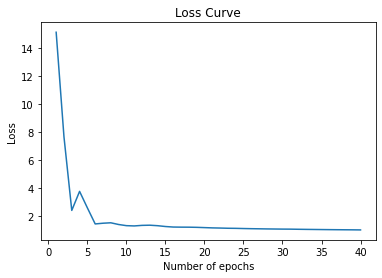

In [115]:
### Curva do resultado da função de perda

buildMPLPerceptron(train_features, test_features, train_targets, test_targets, layer_size = max_idx)

model = classifier.fit(train_features, train_targets)

plt.plot(range(1, model.n_iter_ + 1), model.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

In [116]:
# activation{'identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
## Testar diferentes Funções de Ativação
activation = ['identity', 'logistic', 'tanh', 'relu']
scores_dict = dict()
for act in activation:
    score = buildMPLPerceptron(train_features, test_features, train_targets, test_targets, activation_function = act)
    scores_dict[act] = score


In [117]:
scores_dict

{'identity': (0.6885, 0.7333, 0.6667),
 'logistic': (0.6066, 0.8, 0.3636),
 'tanh': (0.7049, 0.7778, 0.6364),
 'relu': (0.7049, 0.6923, 0.8182)}

In [118]:
max_idx = max(scores_dict, key= lambda x: scores_dict[x][0])
print(f"""
    Melhor resultado com função de ativação {max_idx}
    Accuracy: {round(scores_dict[max_idx][0]*100 , 2)}%
    Precision: {round(scores_dict[max_idx][1]*100 , 2)}%
    Recall: {scores_dict[max_idx][2]}
""")


    Melhor resultado com função de ativação tanh
    Accuracy: 70.49%
    Precision: 77.78%
    Recall: 0.6364



In [119]:
## Variando o alpha
alpha = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
scores_dict = dict()
for a in alpha:
    score = buildMPLPerceptron(train_features, test_features, train_targets, test_targets, alp = a)
    scores_dict[a] = score

In [120]:
scores_dict

{1: (0.7049, 0.6923, 0.8182),
 0.5: (0.7049, 0.6923, 0.8182),
 0.1: (0.7049, 0.6923, 0.8182),
 0.05: (0.7049, 0.6923, 0.8182),
 0.01: (0.7049, 0.6923, 0.8182),
 0.005: (0.7049, 0.6923, 0.8182),
 0.001: (0.7049, 0.6923, 0.8182),
 0.0005: (0.7049, 0.6923, 0.8182),
 0.0001: (0.7049, 0.6923, 0.8182)}

In [121]:
max_idx = max(scores_dict, key= lambda x: scores_dict[x][0])
print(f"""
    Melhor resultado com alpha {max_idx}
    Accuracy: {round(scores_dict[max_idx][0]*100 , 2)}%
    Precision: {round(scores_dict[max_idx][1]*100 , 2)}%
    Recall: {scores_dict[max_idx][2]}
""")


    Melhor resultado com alpha 1
    Accuracy: 70.49%
    Precision: 69.23%
    Recall: 0.8182



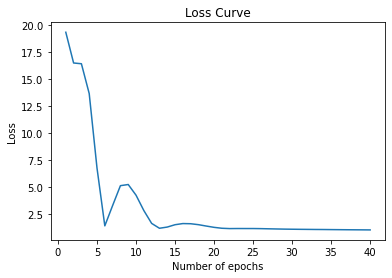

In [122]:
### Curva do resultado da função de perda
# The loss function is the function that computes the distance between the current output 
# of the algorithm and the expected output

buildMPLPerceptron(train_features, test_features, train_targets, test_targets, alp = max_idx)

model = classifier.fit(train_features, train_targets)

plt.plot(range(1, model.n_iter_ + 1), model.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

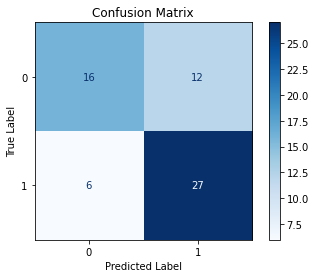

In [123]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'black'
matrix = plot_confusion_matrix(classifier, test_features, test_targets, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()